<a href="https://colab.research.google.com/github/GitAd7/Machine-Learning/blob/main/SVM_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import io

# Peoblem Statement
In this data, we have an independent variable (Features) "Hours" and a dependent variable (Target) "Marks". You have to train the SVR model to understand the relationship between the hours of study and marks of the student to predict the student's marks based on their number of hours dedicated to studies.

# Importing the DataSet

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Student_Marks.csv to Student_Marks.csv


In [3]:
df = pd.read_csv('Student_Marks.csv')

In [4]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


# EDA - Exploratory Data Analysis

In [5]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [6]:
df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [7]:
df = df.drop(['number_courses'], axis =1 )

In [8]:
df.describe()

,time_study,Marks
count,100.000000,100.000000
mean,4.077140,24.417690
std,2.372914,14.326199
min,0.096000,5.609000
25%,2.058500,12.633000
50%,4.022000,20.059500
75%,6.179250,36.676250
max,7.957000,55.299000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_study  100 non-null    float64
 1   Marks       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [10]:
df.isnull().sum()

time_study    0
Marks         0
dtype: int64

In [11]:
df.rename(columns = {"time_study": "Hours"}, inplace= True )
df.head()

,Hours,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


Text(0.5, 1.0, 'Hours of study v/s Marks')

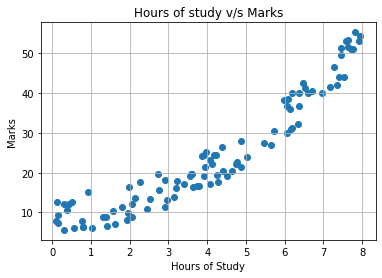

In [14]:
plt.scatter(df.Hours, df.Marks)
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.grid()
plt.title('Hours of study v/s Marks')

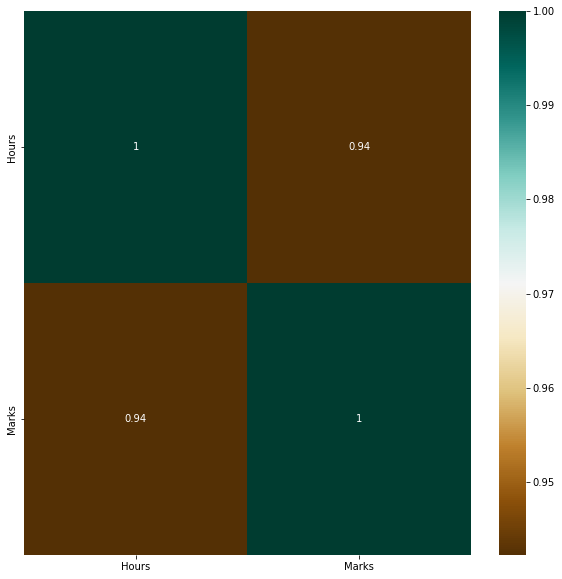

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap= 'BrBG')

# Feature Scalling

* Standardization
* Normalisation
*It converts the data / features in the range of -1 to 1


In [17]:
from sklearn.preprocessing import StandardScaler

In [11]:
#X = np.array(df.Hours)
#Y = np.array(df.Marks)
# This can also be the method to access the columns but it is not that effective as in a big dataset it will be difficult to use it.
# This is used when the target values lies within the features

In [22]:
# So we use iloc function to access the content of Rows
# The first position is used to access the indexing and the next one is used to assign the required column/row.
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [23]:
StanScaler = StandardScaler()

In [25]:
X = StanScaler.fit_transform(X.reshape(-1,1))
Y = StanScaler.fit_transform(Y.reshape(-1,1))

In [26]:
X
# All the values has been scaled b/w -1 to 1

array([[ 0.18248894],
       [-1.68619512],
       [-0.39988653],
       [ 1.6229682 ],
       [ 1.58146071],
       [-0.36684996],
       [ 0.84110266],
       [-0.28129371],
       [ 0.14098145],
       [ 0.8876927 ],
       [ 1.38747674],
       [-1.54769564],
       [ 0.05966066],
       [ 0.08337923],
       [-0.49518433],
       [ 0.07744958],
       [ 0.6954029 ],
       [ 0.84830294],
       [ 1.53910613],
       [-0.04241388],
       [ 0.27778675],
       [ 0.86778604],
       [-0.85816308],
       [ 0.33793025],
       [-0.18726654],
       [-1.13092658],
       [-1.51169425],
       [ 0.12742799],
       [-1.66078237],
       [-1.17666952],
       [-0.09027455],
       [-0.91237695],
       [-1.33211083],
       [ 1.06600548],
       [ 0.00248198],
       [ 1.46795044],
       [-0.47061868],
       [ 1.35782853],
       [ 1.04016918],
       [ 1.56621307],
       [-1.6675591 ],
       [-0.56041039],
       [-0.20590255],
       [-1.06739471],
       [-0.89924703],
       [-0

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 10)

In [28]:
from sklearn.svm import SVR

In [31]:
model = SVR(kernel='rbf')

In [32]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [33]:
Y_pred = model.predict(X_test)

In [37]:
Y_pred = StanScaler.inverse_transform(Y_pred.reshape(-1,1))

In [39]:
Y_test = StanScaler.inverse_transform(Y_test.reshape(-1,1))

Text(0.5, 1.0, 'Actual Marks v/s Predicted Marks')

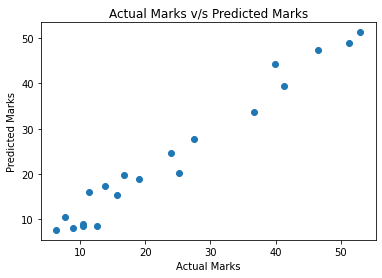

In [41]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks v/s Predicted Marks')

In [42]:
r2_score(Y_test, Y_pred)

0.9686463560293465

In [43]:
mean_squared_error(Y_test, Y_pred)

7.101621247150637

In [44]:
mean_absolute_error(Y_test, Y_pred)

2.2233241367860037